In [33]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime as dt

In [45]:
data1 = pd.read_csv('../raw_data/2021H1sampledata-sentiment.csv', lineterminator='\n')
# data2 = pd.read_csv('../raw_data/2022-06-24_2022-08-12_twitter_transferlearning.csv', lineterminator='\n')
data3 = pd.read_csv('../raw_data/2022-01-01_2022-06-30_BTC-USD_1d.csv', lineterminator='\n')

In [36]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0.1   10000 non-null  int64  
 1   Unnamed: 0     10000 non-null  int64  
 2   date           10000 non-null  object 
 3   process_text   10000 non-null  object 
 4   negative_bert  10000 non-null  float64
 5   neutral_bert   10000 non-null  float64
 6   positive_bert  10000 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 547.0+ KB


In [46]:
data3['Date'] = pd.to_datetime(data3['Date'])


In [54]:
data1 = data1[['date','process_text','negative_bert','neutral_bert','positive_bert']]

In [57]:
data1['Date']=data1['date']

/tmp/ipykernel_30029/3214548215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Date']=data1['date']


In [61]:
data3.

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,price_change
0,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004,BTC-USD,NaN
1,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547,BTC-USD,-0.007163
2,2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188,46458.117188,33071628362,BTC-USD,-0.018737
3,2022-01-04,46458.851562,47406.546875,45752.464844,45897.574219,45897.574219,42494677905,BTC-USD,-0.012066
4,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859,BTC-USD,-0.050734
...,...,...,...,...,...,...,...,...,...
175,2022-06-25,21233.609375,21520.914062,20964.585938,21502.337891,21502.337891,18372538715,BTC-USD,0.012749
176,2022-06-26,21496.494141,21783.724609,21016.269531,21027.294922,21027.294922,18027170497,BTC-USD,-0.022093
177,2022-06-27,21028.238281,21478.089844,20620.199219,20735.478516,20735.478516,20965695707,BTC-USD,-0.013878
178,2022-06-28,20731.544922,21164.423828,20228.812500,20280.634766,20280.634766,21381535161,BTC-USD,-0.021936


In [51]:
data1.sort_values(by='date', inplace=True)

In [39]:
data1['date'] = pd.to_datetime(data1['date'])

In [40]:
data1.groupby(data1['date'].dt.date).mean()

# df.date.dt.day

/tmp/ipykernel_30029/1986020640.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data1.groupby(data1['date'].dt.date).mean()


,Unnamed: 0.1,Unnamed: 0,negative_bert,neutral_bert,positive_bert
date,,,,,
2022-01-01,182.150000,182.150000,0.076243,0.544750,0.379008
2022-01-02,474.564103,474.564103,0.025468,0.568633,0.405900
2022-01-03,888.914894,888.914894,0.053689,0.487297,0.459014
2022-01-04,1377.107143,1377.107143,0.120855,0.509412,0.369732
2022-01-05,1882.612245,1882.612245,0.144648,0.487103,0.368249
...,...,...,...,...,...
2022-06-26,90772.551724,90772.551724,0.146412,0.567548,0.286040
2022-06-27,91286.296875,91286.296875,0.073990,0.598382,0.327628
2022-06-28,91870.122807,91870.122807,0.075534,0.624125,0.300341


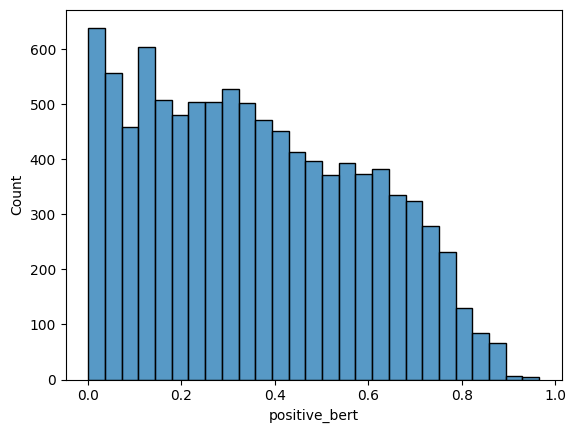

In [75]:
sns.histplot(data1['positive_bert']);


In [68]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 5094 to 6701
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           10000 non-null  object 
 1   process_text   10000 non-null  object 
 2   negative_bert  10000 non-null  float64
 3   neutral_bert   10000 non-null  float64
 4   positive_bert  10000 non-null  float64
 5   Date           10000 non-null  object 
dtypes: float64(3), object(3)
memory usage: 546.9+ KB


In [78]:
data1['date']

5094    2022-01-01
8091    2022-01-01
1979    2022-01-01
5383    2022-01-01
7892    2022-01-01
           ...    
3677    2022-06-30
8506    2022-06-30
7052    2022-06-30
9611    2022-06-30
6701    2022-06-30
Name: date, Length: 10000, dtype: object

In [ ]:
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(50,8))

sns.lineplot(data = data3['Close'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = data1, x=data1['date'], y=data1['positive_bert'], alpha=0.5, ax=ax2)
# sns.regplot(x=data1['date'], y=data1['positive_bert'], scatter=False)

<Axes: ylabel='Close'>

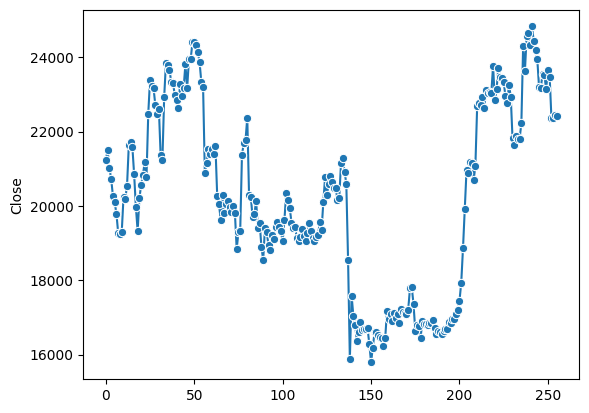

In [24]:
sns.lineplot(data = data3['Close'], marker='o', sort = False)